# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #pause for 1 secound using time.sleep() - avoids the openweather API key from being disabled
        time.sleep(1)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng =  city_weather ['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity =city_weather ['main']['humidity']
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather ['wind']['speed']
        city_country =city_weather ['sys']['country']
        city_date = city_weather ['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | argo
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | kyaikkami
Processing Record 5 of Set 1 | little cayman
City not found. Skipping...
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | strathmore
Processing Record 8 of Set 1 | harpanahalli
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | ahau
City not found. Skipping...
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | pachino
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | tete
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | cantonment
Processing Record 21 of Set 1 | pu

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,71.19,92,97,5.99,ZA,1732549160
1,argo,37.6333,22.7333,51.03,39,0,1.66,GR,1732549161
2,hithadhoo,-0.6000,73.0833,82.83,76,100,14.12,MV,1732549162
3,kyaikkami,16.0800,97.5675,82.80,69,42,5.68,MM,1732549163
4,grytviken,-54.2811,-36.5092,37.42,75,100,1.88,GS,1732549165


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

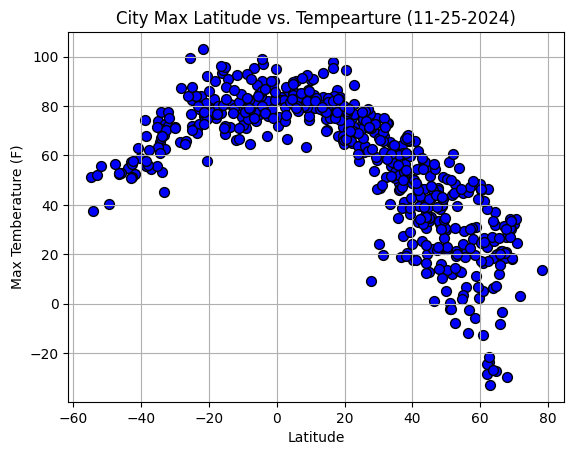

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color = "blue",
    edgecolor = "black",
    linewidths=1,
    marker="o",
    label = "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Tempearture (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temberature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/newFig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

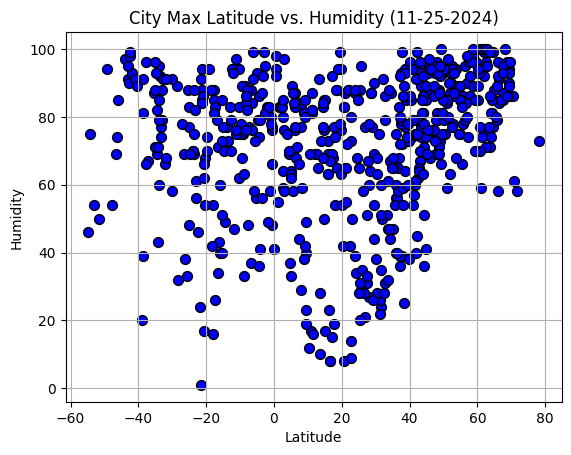

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color = "blue",
    edgecolor = "black",
    linewidths=1,
    marker="o",
    label = "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

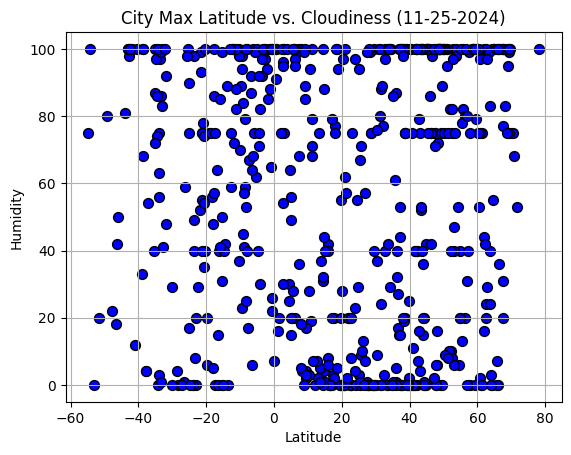

In [26]:
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color = "blue",
    edgecolor = "black",
    linewidths=1,
    marker="o",
    label = "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

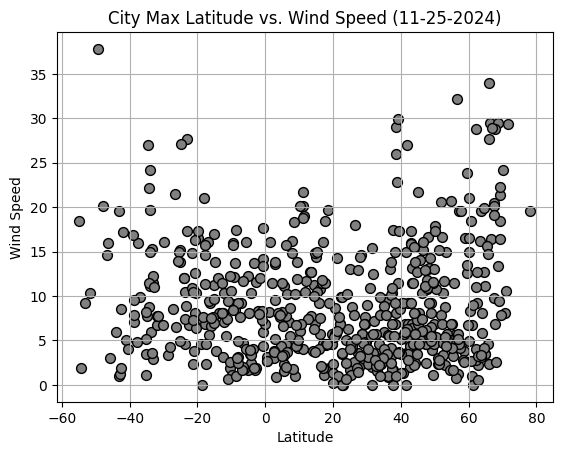

In [27]:
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color = "gray",
    edgecolor = "black",
    linewidths=1,
    marker="o",
    label = "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):

    #compute liner regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.xlabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,argo,37.6333,22.7333,51.03,39,0,1.66,GR,1732549161
3,kyaikkami,16.0800,97.5675,82.80,69,42,5.68,MM,1732549163
5,strathmore,51.0501,-113.3852,-2.07,84,95,2.30,CA,1732549166
6,harpanahalli,14.8000,75.9833,70.47,50,88,6.98,IN,1732549167
7,olonkinbyen,70.9221,-8.7187,24.60,61,68,10.60,SJ,1732549169


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,71.19,92,97,5.99,ZA,1732549160
2,hithadhoo,-0.6000,73.0833,82.83,76,100,14.12,MV,1732549162
4,grytviken,-54.2811,-36.5092,37.42,75,100,1.88,GS,1732549165
8,port elizabeth,-33.9180,25.5701,70.09,95,75,24.16,ZA,1732548917
9,edinburgh of the seven seas,-37.0676,-12.3116,54.59,67,54,9.84,SH,1732549176


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7100919980294585


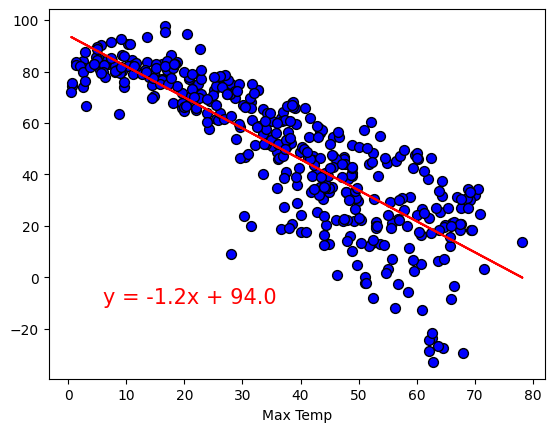

In [71]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10), "blue")

The r-value is: 0.530948790955722


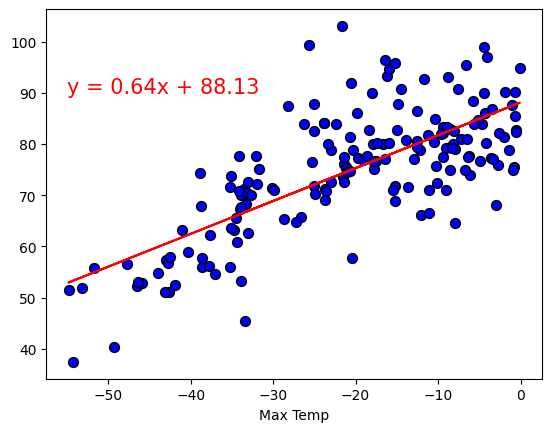

In [72]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,90), "blue")

**Discussion about the linear relationship:** The high r value indicates a strong positive correlatin between latitude and max temperature.  R values ~ .5 indicate that there is a moderate positive correlation in the southern hemispher (due to season). 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15892340359869508


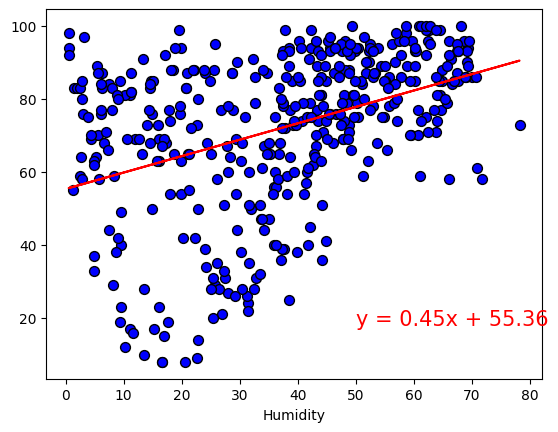

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,18), "blue")

The r-value is: 0.0030688143233260213


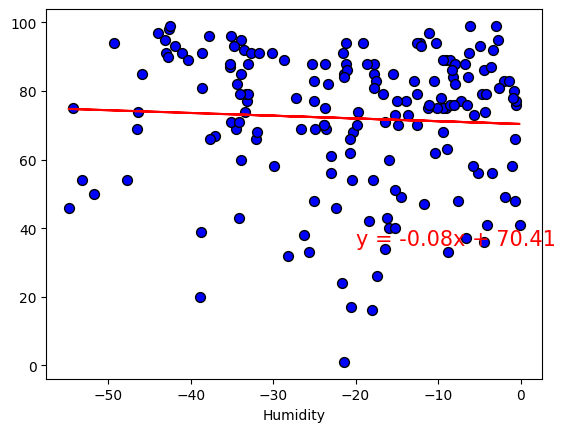

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-20,35), "blue")

**Discussion about the linear relationship:** Weak to no relationship between the humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03508635996039906


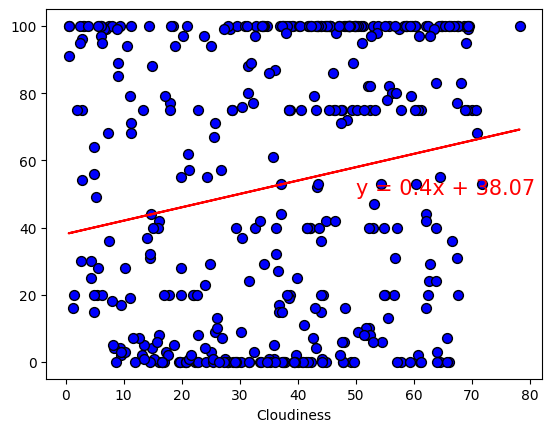

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (50,50), "blue")

The r-value is: 0.014778854804070339


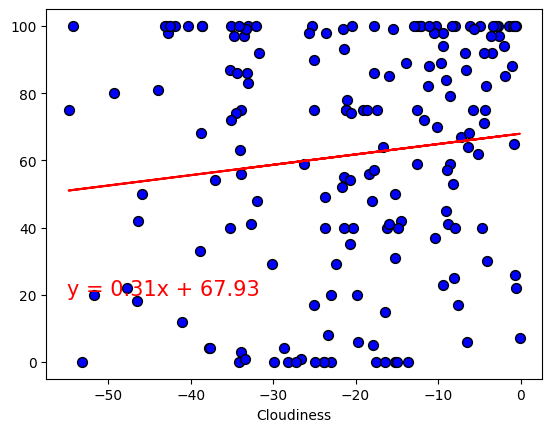

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,20), "blue")

**Discussion about the linear relationship:** Weak to no relationship between the cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.050556606739171756


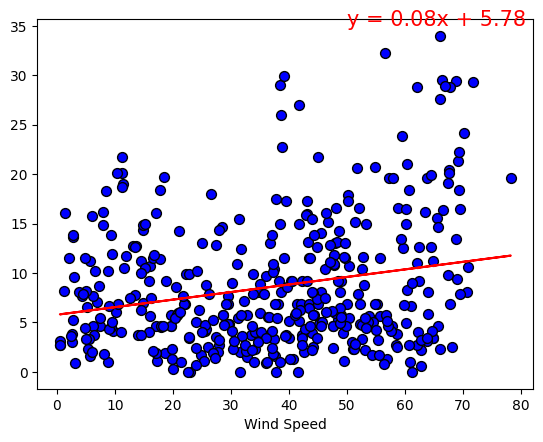

In [77]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (50,35), "blue")

The r-value is: 0.05423402231457057


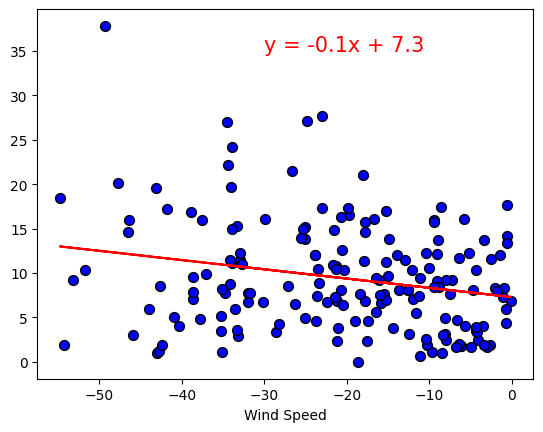

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-30,35 ), "blue")

**Discussion about the linear relationship:** Weak to no relationship between the wind speed and latitude. 